In [1]:
import numpy as np
import pandas as p
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

DATA LOADING USING PANDAS

In [2]:
d=p.read_csv("E:\PROJ 4th\heart_dataset.csv")

In [3]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
d.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
d.shape

(1025, 14)

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
d.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:

d["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
A = d.drop(columns='target',axis=1)
B = d['target']

In [11]:
print(A)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
print(B)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


DATA PREPROCESSING 

In [13]:
A_train , A_test , B_train , B_test = train_test_split ( A , B , test_size=0.2 , random_state=2 )

In [14]:
print("The dataset has ",A.shape," no of rows and columns")
print("The training dataset has ",A_train.shape," no of rows and columns")
print("The testing dataset has ",A_test.shape," no of rows and columns")

The dataset has  (1025, 13)  no of rows and columns
The training dataset has  (820, 13)  no of rows and columns
The testing dataset has  (205, 13)  no of rows and columns


In [15]:
print("The dataset has ",B.shape," no of rows and columns")
print("The training dataset has ",B_train.shape," no of rows and columns")
print("The testing dataset has ",B_test.shape," no of rows and columns")

The dataset has  (1025,)  no of rows and columns
The training dataset has  (820,)  no of rows and columns
The testing dataset has  (205,)  no of rows and columns


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

A_train_std=scaler.fit_transform(A_train)

A_test_std=scaler.transform(A_test)

In [18]:
print(A_train_std)

[[ 0.16856381  0.68138514  0.06823285 ... -2.23202634 -0.72853503
  -0.52277804]
 [-0.27552399  0.68138514  1.04982822 ...  0.98743118  3.12565027
  -0.52277804]
 [-0.16450204  0.68138514  1.04982822 ...  0.98743118  2.16210395
  -0.52277804]
 ...
 [ 0.05754186  0.68138514 -0.91336252 ... -0.62229758  0.2350113
   1.09487477]
 [ 0.05754186  0.68138514 -0.91336252 ... -0.62229758  0.2350113
   1.09487477]
 [ 0.83469552 -1.46759877 -0.91336252 ...  0.98743118 -0.72853503
  -0.52277804]]


In [19]:
print(A_test_std)

[[ 1.72287112  0.68138514 -0.91336252 ... -0.62229758  2.16210395
  -0.52277804]
 [ 0.27958576  0.68138514 -0.91336252 ... -0.62229758 -0.72853503
  -2.14043085]
 [ 0.83469552  0.68138514 -0.91336252 ... -0.62229758  1.19855762
   1.09487477]
 ...
 [-0.60858984 -1.46759877  0.06823285 ... -0.62229758 -0.72853503
  -0.52277804]
 [-0.38654594  0.68138514  1.04982822 ... -0.62229758 -0.72853503
  -0.52277804]
 [-0.05348009  0.68138514 -0.91336252 ... -0.62229758  0.2350113
  -0.52277804]]


NEURAL NETWORK MODEL BUILDING

In [20]:

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [21]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),     #  -> First/Input Layer 
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),     #  -> Second/Hidden Layer
    keras.layers.Dense(2,activation='sigmoid')   #  -> Third/Output Layer 
                                                 #  ->The number of neuron in output layer = No of classifier
])

COMPILING THE NEURAL NETWORK

In [22]:
model.compile( optimizer='adam' ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history=model.fit(A_train_std,B_train,validation_split=0.1,epochs=10)

Epoch 1/10
24/24 [==============================] - 2s 22ms/step - loss: 0.5835 - accuracy: 0.7276 - val_loss: 0.4522 - val_accuracy: 0.8902
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.4090 - accuracy: 0.8469 - val_loss: 0.3189 - val_accuracy: 0.9024
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.8645 - val_loss: 0.2850 - val_accuracy: 0.9024
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.8794 - val_loss: 0.2666 - val_accuracy: 0.9024
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2703 - accuracy: 0.8943 - val_loss: 0.2502 - val_accuracy: 0.8902
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.8889 - val_loss: 0.2354 - val_accuracy: 0.8902
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2169 - accuracy: 0.9241 - val_loss: 0.1933 - val_accuracy: 0.9146
Epoch 8/10
24/24 [=

VISUALIZATION

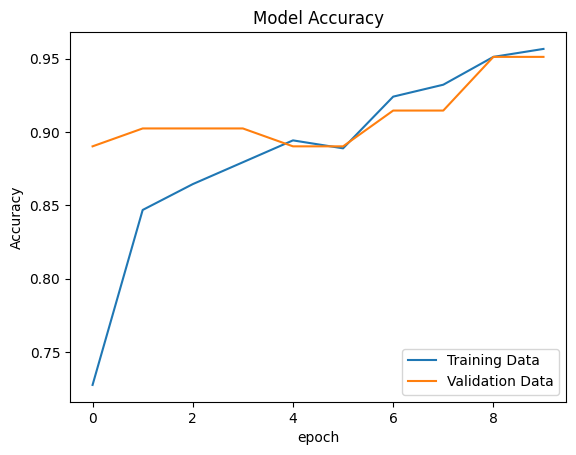

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'],loc='lower right')

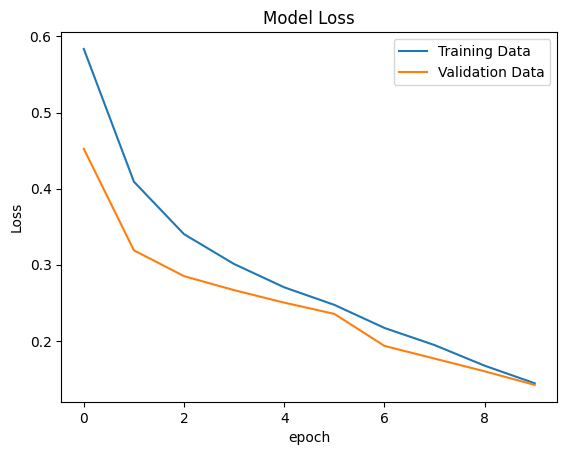

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'],loc='upper right')

In [26]:
loss,accuracy=model.evaluate(A_test_std,B_test)
print(accuracy)
print("The Acurracy of our model is : ",accuracy*100,"%")

7/7 [==============================] - 0s 4ms/step - loss: 0.1549 - accuracy: 0.9610
0.9609755873680115
The Acurracy of our model is :  96.09755873680115 %


In [27]:
print(A_test_std.shape)

(205, 13)


In [28]:
print(A_test_std[0])

[ 1.72287112  0.68138514 -0.91336252 -0.08491216  1.51940083 -0.41201637
 -1.02383022 -1.72094573 -0.70258435  1.10703632 -0.62229758  2.16210395
 -0.52277804]


In [29]:
B_pred =model.predict(A_test_std)

7/7 [==============================] - 0s 2ms/step


In [30]:
print(B_pred.shape)

(205, 2)


In [31]:
print(A_test_std)

[[ 1.72287112  0.68138514 -0.91336252 ... -0.62229758  2.16210395
  -0.52277804]
 [ 0.27958576  0.68138514 -0.91336252 ... -0.62229758 -0.72853503
  -2.14043085]
 [ 0.83469552  0.68138514 -0.91336252 ... -0.62229758  1.19855762
   1.09487477]
 ...
 [-0.60858984 -1.46759877  0.06823285 ... -0.62229758 -0.72853503
  -0.52277804]
 [-0.38654594  0.68138514  1.04982822 ... -0.62229758 -0.72853503
  -0.52277804]
 [-0.05348009  0.68138514 -0.91336252 ... -0.62229758  0.2350113
  -0.52277804]]


In [32]:
print(B_pred)

[[0.8401071  0.03924339]
 [0.3136917  0.66915303]
 [0.8366175  0.03887342]
 [0.8401071  0.03924339]
 [0.03118343 0.9703155 ]
 [0.2280607  0.7429666 ]
 [0.7163909  0.12154029]
 [0.8581322  0.04454222]
 [0.6998242  0.18301804]
 [0.17954503 0.8122833 ]
 [0.5228698  0.44322273]
 [0.77825737 0.29252172]
 [0.698835   0.27198747]
 [0.31673512 0.64079994]
 [0.10628884 0.89030874]
 [0.18175995 0.7658269 ]
 [0.11679655 0.92669886]
 [0.4216011  0.29069892]
 [0.04438899 0.9527612 ]
 [0.24490714 0.6562512 ]
 [0.21601608 0.7450268 ]
 [0.04810015 0.97347575]
 [0.09429426 0.8838817 ]
 [0.7516748  0.11693448]
 [0.90410244 0.05073939]
 [0.72075194 0.23731709]
 [0.8353644  0.02958949]
 [0.3167022  0.4434928 ]
 [0.9369634  0.02430876]
 [0.64481026 0.34203556]
 [0.86821216 0.10246601]
 [0.8483575  0.07935292]
 [0.20333478 0.8387091 ]
 [0.8421866  0.05827542]
 [0.70372754 0.13152461]
 [0.03898696 0.9793565 ]
 [0.21309586 0.82757497]
 [0.173066   0.82857317]
 [0.15662003 0.7336779 ]
 [0.23606157 0.78022254]


COVERTING THE PREDICTION PROBABILITY OF EACH CLASS

In [33]:
B_pred_labels=[np.argmax(i) for i in B_pred]  # -> argmax fuction gives the index of maximum value in a list

In [34]:
print(B_pred_labels)

[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]


Predictive System

In [35]:
input=(65,0,2,140,417,1,0,157,0,0.8,2,1,2)

#change the input tuple to numpy array

input_numpy=np.asarray(input)

#reshaping the array so as to predict for one data point

input_reshaped=input_numpy.reshape(1,-1)

#standardizing the input data

input_std=scaler.transform(input_reshaped)


prediction = model.predict(input_std)

print(prediction)

prediction_label=[np.argmax(prediction)]
print(prediction_label)


if(prediction_label[0]==0):
  print("Person does not have heart disease")
else:
  print("Person has heart disease")



1/1 [==============================] - 0s 70ms/step
[[0.26671913 0.70929253]]
[1]
Person has heart disease


C:\Users\Akshat\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
